## Introduction

Does it rain *more* in Seattle, Washington or New York City, New York? To answer this question, precipitation data from various weather stations from the years 2020 to 2023 has been examined in this notebook.

## Import libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load and Clean Data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

Their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) was used to request records of daily precipitation from Seattle and New York (or other locations of interest) for the 3 year period January 2020 - January 2024.

The data sets are available at this [github repository](https://github.com/galenegan/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `ny_rain.csv`.

Load the Seattle data set

In [148]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

Load the New York data set

In [149]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

### Explore the Data

This code shows samples of some of the rows in the data sets, sees if the names of the columns are the same, and overall tries to examine whether or not these are appropriate data sets for our investigation.

In [150]:
# Look at head of each dataframe
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [151]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [152]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [153]:
# See if the columns are the same
print(df_seattle.columns)
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


In [154]:
set(df_seattle.columns) == set(df_ny.columns)

True

In [155]:
# Checking the types
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [156]:
# Checking the types
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [157]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7003 non-null   object 
 1   NAME       7003 non-null   object 
 2   LATITUDE   7003 non-null   float64
 3   LONGITUDE  7003 non-null   float64
 4   ELEVATION  7003 non-null   float64
 5   DATE       7003 non-null   object 
 6   DAPR       143 non-null    float64
 7   MDPR       143 non-null    float64
 8   PRCP       6718 non-null   float64
 9   SNOW       3006 non-null   float64
 10  SNWD       1331 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 711.4+ KB


In [158]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    17465 non-null  object 
 1   NAME       17465 non-null  object 
 2   LATITUDE   17465 non-null  float64
 3   LONGITUDE  17465 non-null  float64
 4   ELEVATION  17465 non-null  float64
 5   DATE       17465 non-null  object 
 6   DAPR       155 non-null    float64
 7   MDPR       151 non-null    float64
 8   PRCP       17275 non-null  float64
 9   SNOW       11508 non-null  float64
 10  SNWD       6318 non-null   float64
 11  DASF       0 non-null      float64
 12  MDSF       0 non-null      float64
dtypes: float64(10), object(3)
memory usage: 1.7+ MB


In [159]:
df_seattle["NAME"].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

In [160]:
df_ny["NAME"].unique()

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

The data sets appear to be very similar, which is good.

The only problems are:
*   The Seattle data is missing some days.
*   The New York data has one more day then should be possible.
*   The New York data set has more weather stations than the Seattle data set.
*   The datatype of 'DATE' for both sets is not datetime.

### Convert Data Types
Let's convert 'DATE' to a datetime for both sets.

In [161]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [162]:
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

### Remove Unnecessary Columns
We're not interested in many of the columns. We can simply drop them.

In [163]:
bad_cols = ["LATITUDE", "LONGITUDE", "ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=bad_cols)
df_ny = df_ny.drop(columns=bad_cols)

### Remove Duplicate Entries and Drop NaNs
This code drops any rows that have and NaN values. Note that many columns have been dropped already, so we are only dropping rows that have NaN for 'STATION', 'NAME', 'DATE', or 'PRCP'.

In [164]:
df_seattle = df_seattle.dropna()
df_ny = df_ny.dropna()

### Convert Data into Average PRCP by Day

In [165]:
df_seattle = df_seattle.groupby(by="DATE", as_index=False)["PRCP"].mean()
df_ny = df_ny.groupby(by="DATE", as_index=False)["PRCP"].mean()

### Rename Columns and Concatinate Tables
This code renames the columns, adds the city name to each row, and concatinates the tables. Adding city names makes it clear which precipitation value came from which city.

In [166]:
df_seattle['city'] = 'Seattle'
df_ny['city'] = 'New York City'
df = pd.concat([df_seattle, df_ny])
df = df.rename(columns={"DATE": "date", "PRCP": "precipitation"})

### Add Time Columns
It would be nice to aggregate the dates by different time units such as quarter 1 of 2020. This code creates creates columns for quarter, year, month, cumulative_month, and cumulative_quarter.

In [167]:
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [168]:
df['cumulative_month'] = (df['year'] - 2020) * 12 + df['month'] - 1

In [169]:
df['cumulative_quarter'] = (df['year'] - 2020) * 4 + df['quarter'] - 1

In [170]:
df

,date,precipitation,city,quarter,year,month,cumulative_month,cumulative_quarter
0,2020-01-01,0.162500,Seattle,1,2020,1,0,0
1,2020-01-02,0.181250,Seattle,1,2020,1,0,0
2,2020-01-03,0.267500,Seattle,1,2020,1,0,0
3,2020-01-04,0.172000,Seattle,1,2020,1,0,0
4,2020-01-05,0.168571,Seattle,1,2020,1,0,0
...,...,...,...,...,...,...,...,...
1456,2023-12-27,0.051538,New York City,4,2023,12,47,15
1457,2023-12-28,1.845000,New York City,4,2023,12,47,15
1458,2023-12-29,0.103571,New York City,4,2023,12,47,15
1459,2023-12-30,0.006429,New York City,4,2023,12,47,15


The clean data looks as expected. Each row contains the date, the city, the average precipitation observed by weather stations in that city on that day, as well as the quarter, year, month, cumulative_month, and cumulative_quarter. The dates are only in the years from 2020 to 2023, but some dates are missing. There are no NaNs in the clean data.

### Export Data
The following code exports our clean data frame to a csv, and then copies it into the user's google drive.

In [171]:
df.to_csv('clean_seattle_nyc_weather.csv', index=False)

In [172]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [173]:
!cp clean_seattle_nyc_weather.csv "drive/My Drive/"

## Questions

The following are the questions that will be attempted to be answered by this notebook:

*   Which city has the higher average precipitation?
*   Does either city have rainy or dry seasons?
*   How heavily does it rain in each city?

## Analysis

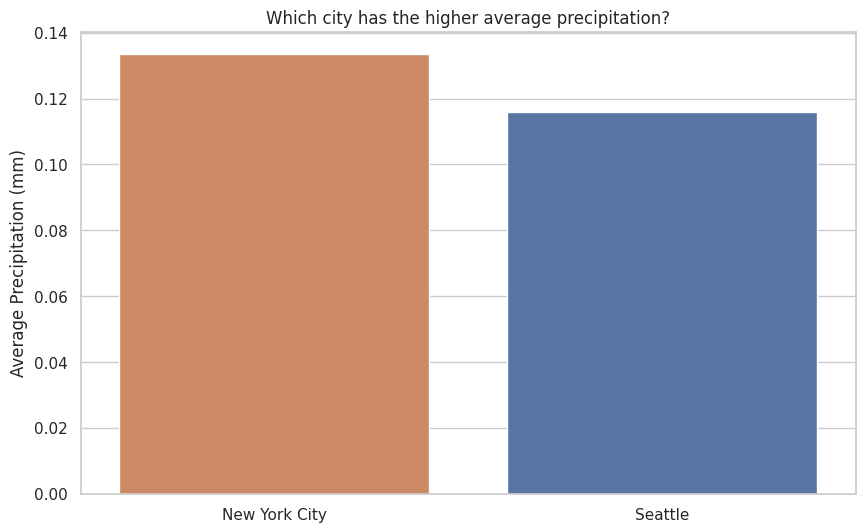

In [174]:
avg_precipitation = df.groupby('city')[['precipitation']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='precipitation', hue='city', hue_order=['Seattle', 'New York City'], data=avg_precipitation)

plt.title('Which city has the higher average precipitation?')
text = plt.ylabel('Average Precipitation (mm)')
text = plt.xlabel('')

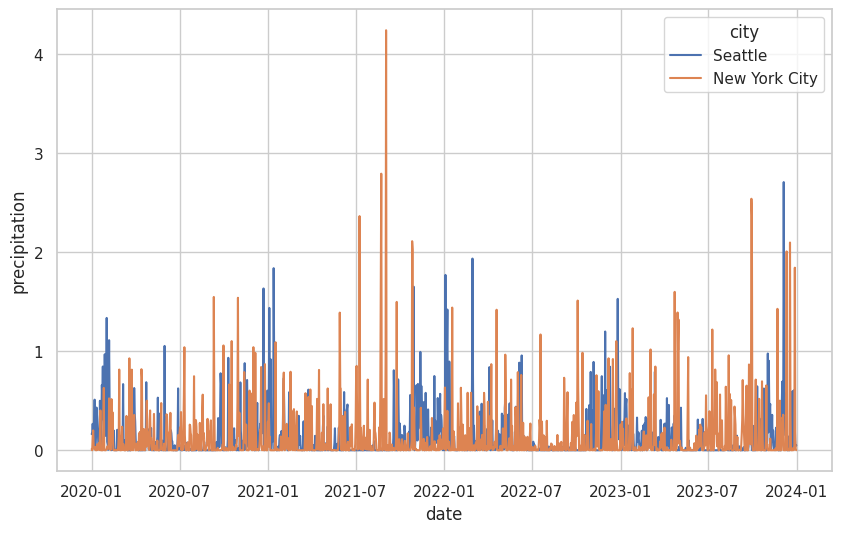

In [175]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=df, x='date', y='precipitation', hue='city')

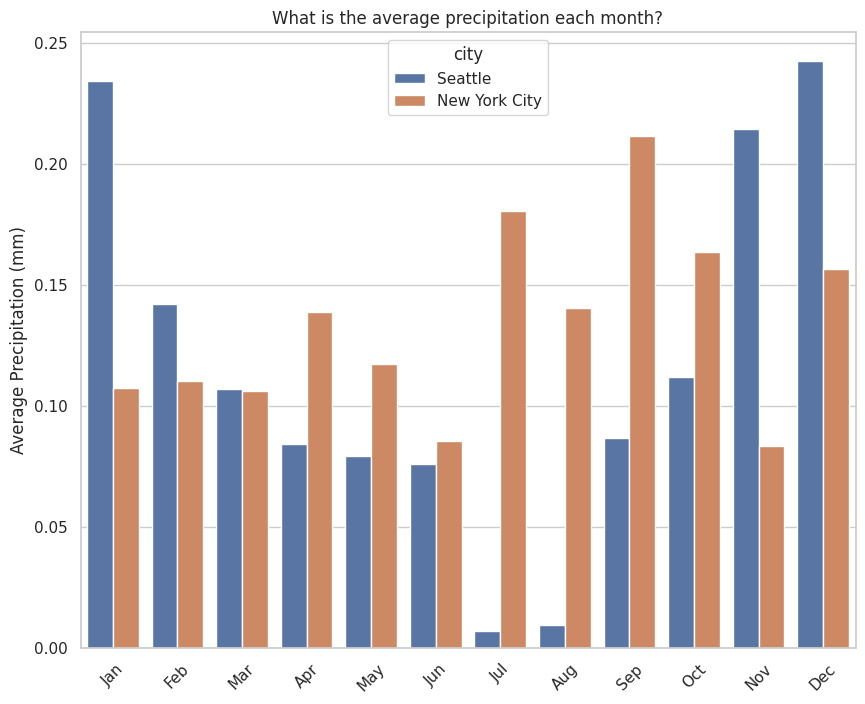

In [176]:
def format_month(x, pos):
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return f'{months[x]}'

plt.figure(figsize=(10, 8))
plot = sns.barplot(x='month', y='precipitation', hue='city', data=df, errorbar=None)

# Use the format_month function when formatting xaxis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_month))
plt.xticks(rotation=45)
plt.title('What is the average precipitation each month?')
text = plt.ylabel('Average Precipitation (mm)')
text = plt.xlabel('')

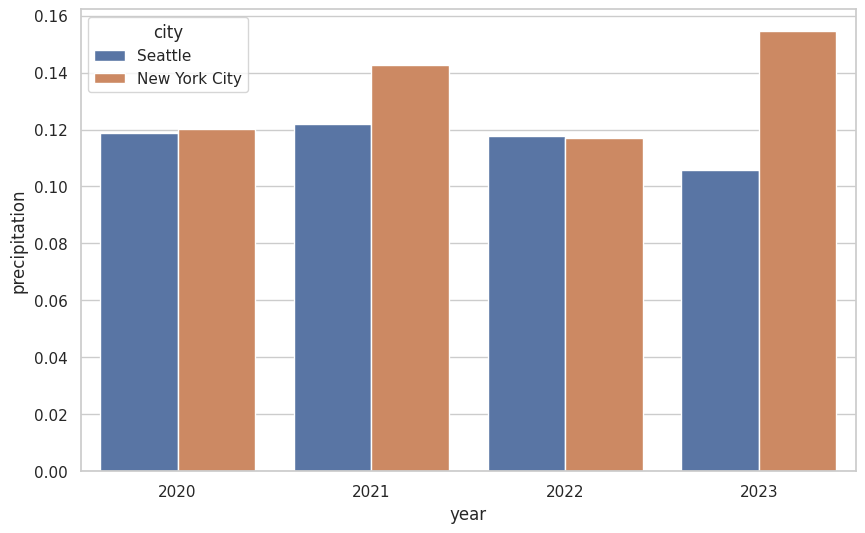

In [177]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='year', y='precipitation', hue='city', data=df, errorbar=None)

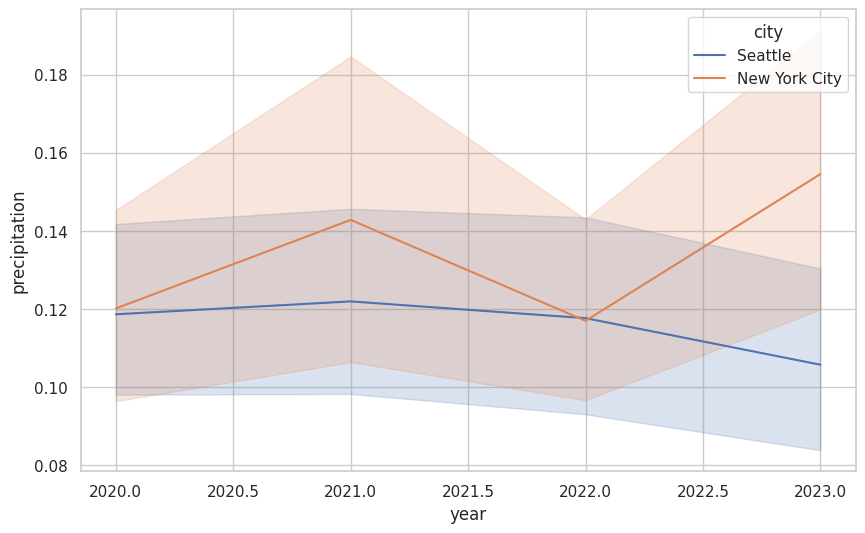

In [178]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='year', y='precipitation', hue='city', data=df)

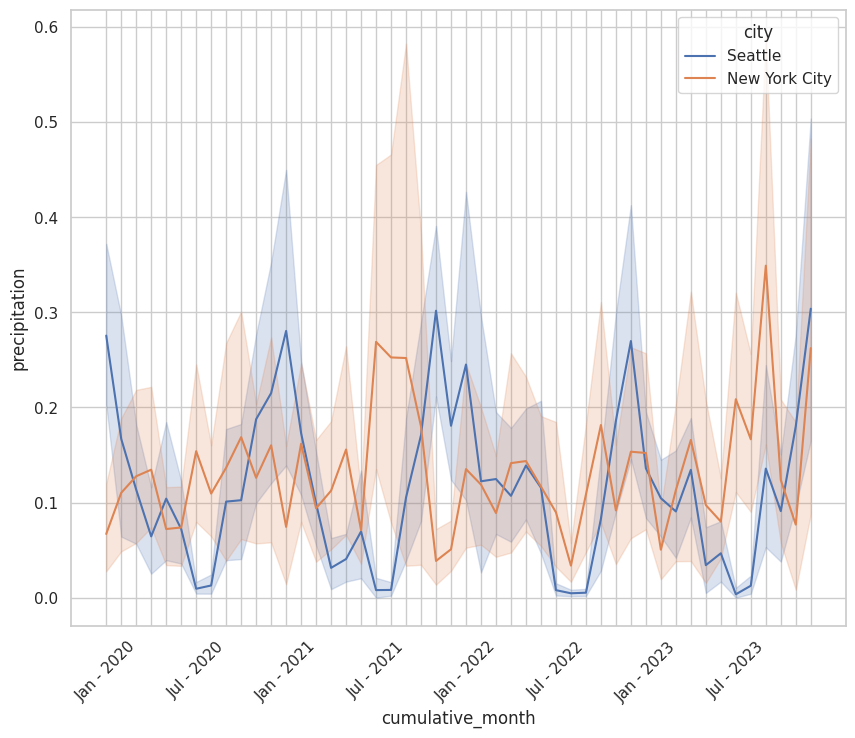

In [179]:
def format_month(x):
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    month = months[int(x % 12)]
    year = 2020 + x // 12
    return f'{month} - {year}'

plt.figure(figsize=(10, 8))
sns.lineplot(x='cumulative_month', y='precipitation', hue='city', data=df);

months = df['cumulative_month'].unique()
month_labels = [None for i in range(len(months))]
# Label only the months of Jan and Jul, otherwise make the label ''
for i in range(len(month_labels)):
  remainder = int(i%12)
  if remainder == 0 or remainder == 6:
    month_labels[i] = format_month(i)
  else:
    month_labels[i] = ''
plt.xticks(rotation=45)
text = plt.xticks(ticks=months, labels=month_labels)

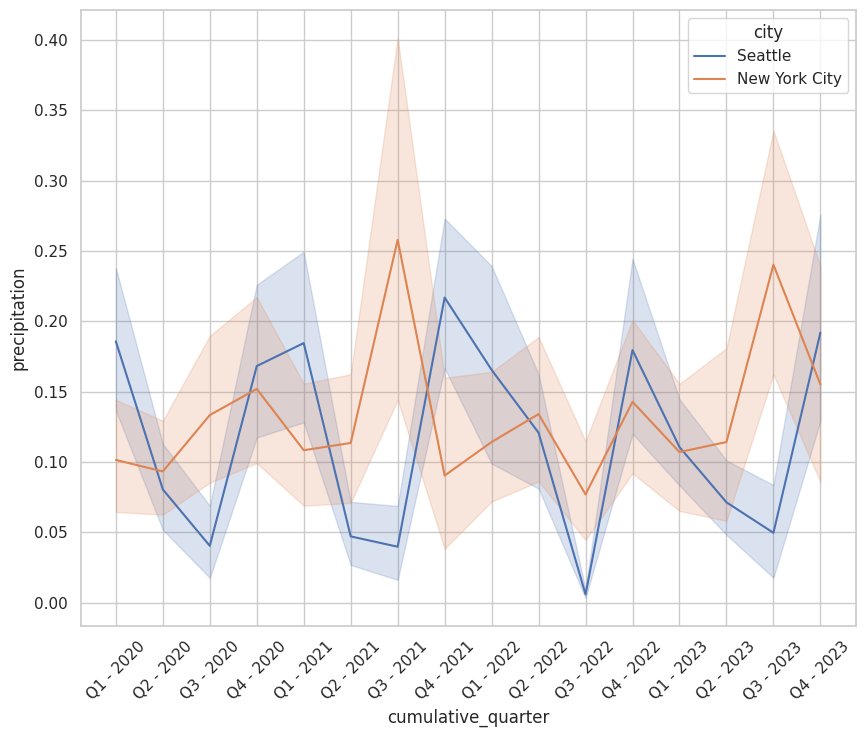

In [180]:
def format_quarter(x, pos):
    year = 2020 + x // 4
    quarter = int(x % 4) + 1
    return f'Q{quarter} - {year}'

plt.figure(figsize=(10, 8))
sns.lineplot(x='cumulative_quarter', y='precipitation', hue='city', data=df)

# Use the format_month function when formatting xaxis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_quarter))
plt.xticks(rotation=45)
quarters = df['cumulative_quarter'].unique()
text = plt.xticks(ticks=quarters, labels=[format_quarter(q, None) for q in quarters])

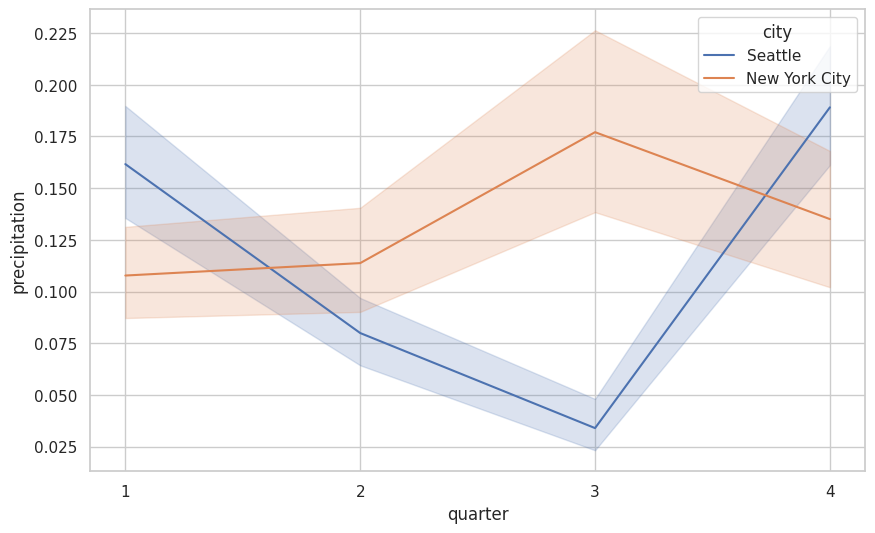

In [181]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='quarter', y='precipitation', hue='city', data=df)
text = plt.xticks(ticks=[1, 2, 3, 4])

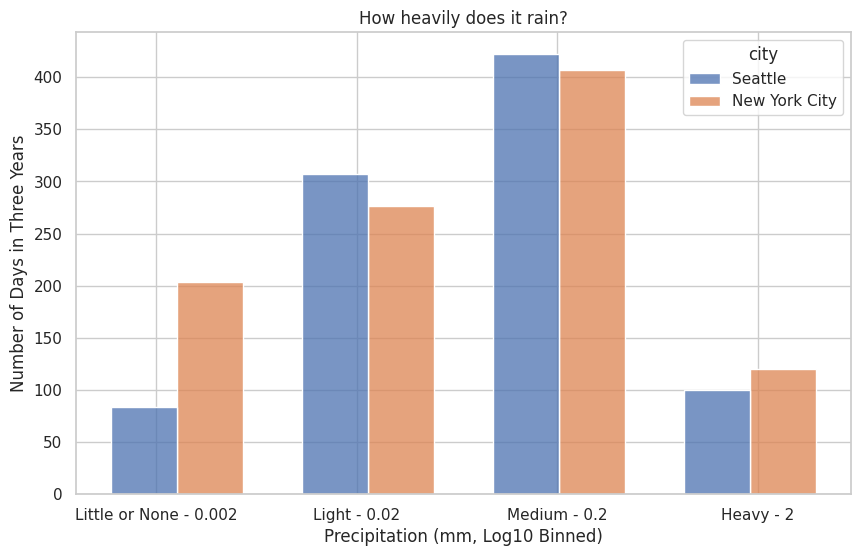

In [182]:
num_bins = 4
plt.figure(figsize=(10, 6))
plot = sns.histplot(x='precipitation', hue='city', data=df, log_scale=10, bins=num_bins, multiple="dodge", shrink=.8)

tick_positions = [0.002, 0.02, 0.2, 2]
tick_labels = ['Little or None', 'Light', 'Medium', 'Heavy']
tick_labels = [tick_labels[i] + ' - ' + str(tick_positions[i]) for i in range(len(tick_positions))]

text = plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.title('How heavily does it rain?')
text = plt.ylabel('Number of Days in Three Years')
text = plt.xlabel('Precipitation (mm, Log10 Binned)')

### Results for communication assignment

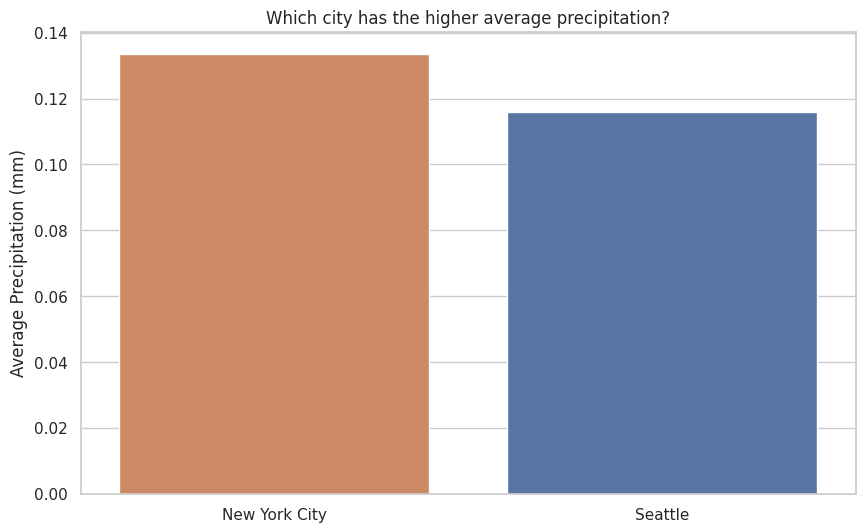

In [183]:
avg_precipitation = df.groupby('city')[['precipitation']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='precipitation', hue='city', hue_order=['Seattle', 'New York City'], data=avg_precipitation)

plt.title('Which city has the higher average precipitation?')
text = plt.ylabel('Average Precipitation (mm)')
text = plt.xlabel('')

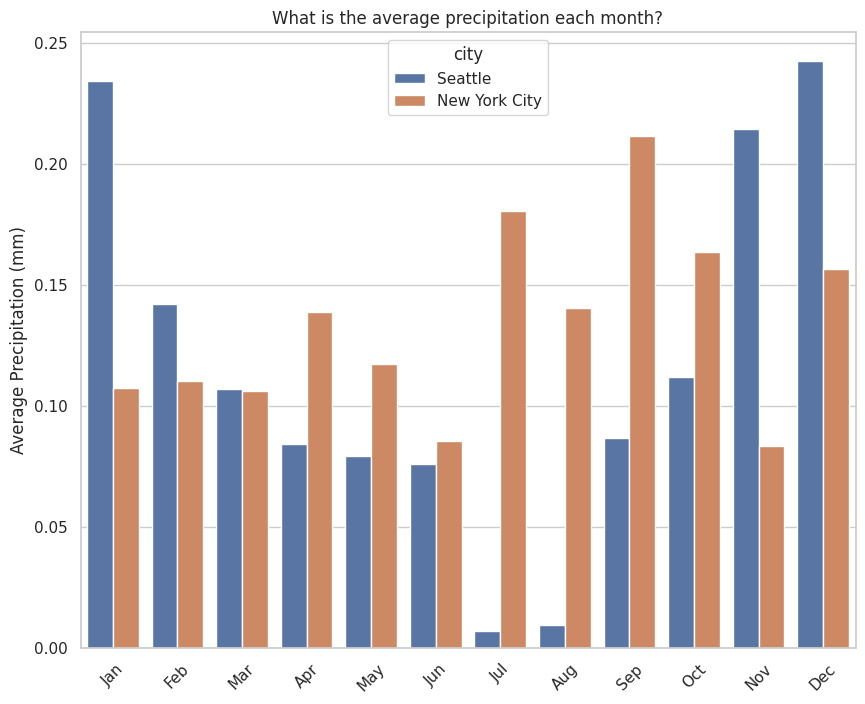

In [184]:
def format_month(x, pos):
    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return f'{months[x]}'

plt.figure(figsize=(10, 8))
plot = sns.barplot(x='month', y='precipitation', hue='city', data=df, errorbar=None)

# Use the format_month function when formatting xaxis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_month))
plt.xticks(rotation=45)
plt.title('What is the average precipitation each month?')
text = plt.ylabel('Average Precipitation (mm)')
text = plt.xlabel('')

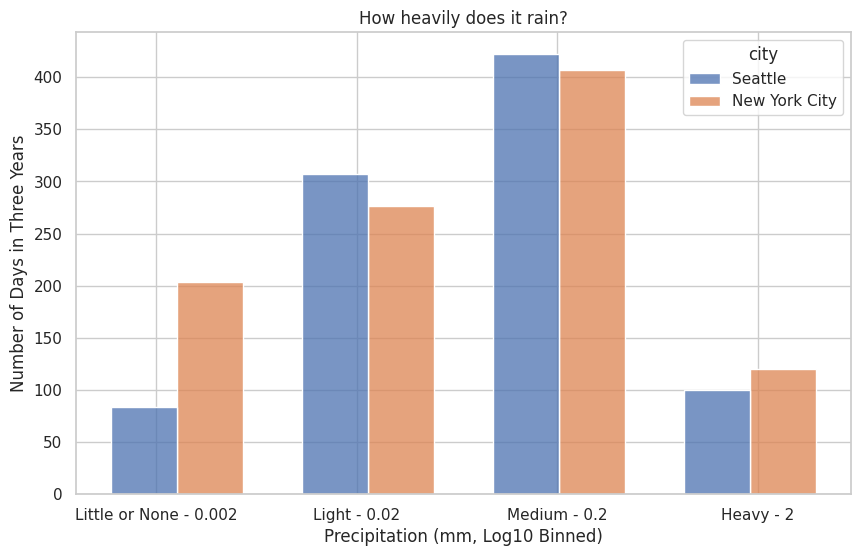

In [185]:
num_bins = 4
plt.figure(figsize=(10, 6))
plot = sns.histplot(x='precipitation', hue='city', data=df, log_scale=10, bins=num_bins, multiple="dodge", shrink=.8)

tick_positions = [0.002, 0.02, 0.2, 2]
tick_labels = ['Little or None', 'Light', 'Medium', 'Heavy']
tick_labels = [tick_labels[i] + ' - ' + str(tick_positions[i]) for i in range(len(tick_positions))]

text = plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.title('How heavily does it rain?')
text = plt.ylabel('Number of Days in Three Years')
text = plt.xlabel('Precipitation (mm, Log10 Binned)')

## Conclusion

In conclusion, New York City gets slightly more rainfall than Seattle on average. Both cities rain a light or medium amount most days, but NYC boasts more dry days while also claiming more days of heavy rainfall than Seattle. Seattle, on the other hand, gets more rain than New York in the winter months, but is in comparison quite dry during July and August. As such, there are many times where either city is experiencing more rainfall than the other.